In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [82]:
df = pd.read_csv('data/bridges.data.version2',names=['IDENTIF','RIVER','LOCATION','ERECTED','PURPOSE','LENGTH','LANES','CLEAR-G','T-OR-D','MATERIAL','SPAN','REL-L','TYPE'])
df = df.replace('?',np.NaN)
df = df.convert_dtypes()
with open('results.txt','r+') as result_file:
    result_file.truncate(0)

In [83]:
# Encoding
def encode(df):
    ignore_columns = ['index','IDENTIF','LOCATION','LANES','TYPE']
    for column in df:
        if column in ignore_columns:
            continue
        oe_style = OneHotEncoder()
        oe_results = oe_style.fit_transform(df[[column]])
        encoded_df = pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)
        encoded_df = encoded_df.dropna()
        df = df.join(encoded_df,rsuffix='_encoder')
    return df

In [84]:
# model implementation
def tree_classifier(dataframe, cleaning_method):
    X= dataframe.drop(['TYPE','IDENTIF','index','RIVER','ERECTED','PURPOSE','LENGTH','CLEAR-G','T-OR-D','MATERIAL','SPAN','REL-L'],axis=1)
    y = dataframe['TYPE']
    model = DecisionTreeClassifier()
    scores = cross_val_score(model,X,y,cv=10)
    model.fit(X,y)
    dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X.columns,class_names=df.TYPE.unique())
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(cleaning_method+"-tree.png")
    with open('results.txt','a+') as result_file:
        result_file.writelines('------------'+ cleaning_method+ '------------\n')
        result_file.writelines("Scores for each iteration:\n")
        for score in scores:
            result_file.writelines(str(score)+'\n')
        result_file.writelines("Mean Scores = "+ str(scores.mean())+'\n')
    return scores
        

In [85]:
# Removing Nans Method
df = df.dropna()
df = df.reset_index()
df = encode(df)
score_drop = tree_classifier(df,'Dropping Na')

c:\users\reza\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [86]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
    most_frequent_category=DataFrame[ColName].mode()[0]
    # replace nan values with most occured category
    DataFrame = DataFrame[ColName].fillna(most_frequent_category,inplace=True)

In [87]:
df = pd.read_csv('data/bridges.data.version2',names=['IDENTIF','RIVER','LOCATION','ERECTED','PURPOSE','LENGTH','LANES','CLEAR-G','T-OR-D','MATERIAL','SPAN','REL-L','TYPE'])
df = df.replace('?',np.NaN)
df = df.convert_dtypes()

In [88]:
nan_values = df.isna()
nan_columns = nan_values. any()
columns_with_nan = df.columns[nan_columns].tolist()
for Columns in ['LOCATION', 'LENGTH', 'LANES', 'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L', 'TYPE']:
    if Columns in ['index','IDENTIF']:
        continue
    impute_nan_most_frequent_category(df,Columns)

In [89]:
df = df.reset_index()
df = encode(df)
score_mode_replace = tree_classifier(df,'Replacing with mode')

c:\users\reza\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


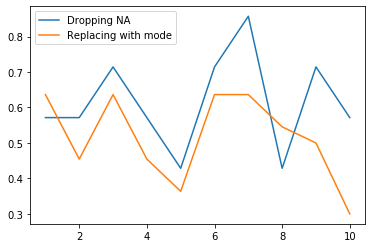

In [90]:
k=[i for i in range(1,11)]
fig = plt.figure()
plt.plot(k,score_drop,label='Dropping NA')
plt.plot(k,score_mode_replace,label='Replacing with mode')
plt.legend()
plt.savefig('errors.png')
plt.show()

